In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#load dataset
df = pd.read_csv("merged_customer_data.csv")
df.head()


,CustomerID,Country,TotalQuantityPurchased,AverageUnitPrice,TotalTransactions
0,10173.0,Netherlands,77,11.514000,5
1,10132.0,France,39,18.883333,3
2,10197.0,Spain,24,18.646667,3
3,10009.0,EIRE,-5,4.620000,1
4,10119.0,Germany,69,15.088000,5


In [ ]:
# Select numeric columns
df_num = df.select_dtypes(include=[np.number]).dropna()
X = df_num.copy()

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_num["PCA1"] = X_pca[:, 0]
df_num["PCA2"] = X_pca[:, 1]

In [ ]:
#elbow method 
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

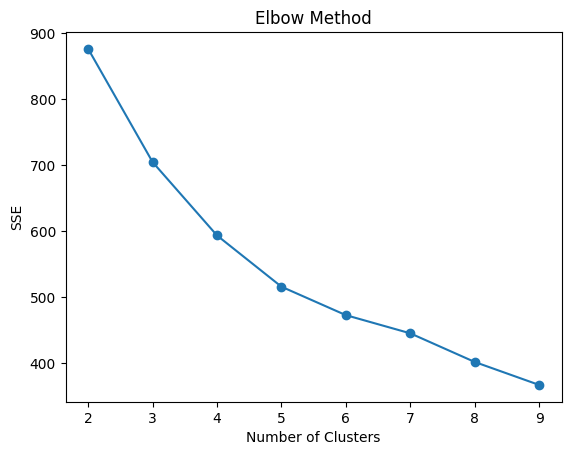

In [7]:
plt.plot(range(2, 10), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_num["Cluster"] = kmeans.fit_predict(X_scaled)


In [ ]:
# Silhouette score
print("Silhouette Score:", silhouette_score(X_scaled, df_num["Cluster"]))

Silhouette Score: 0.26237191754072653


In [ ]:
# Cluster summary
summary = df_num.groupby("Cluster").mean().round(2)
print(summary)


         CustomerID  TotalQuantityPurchased  AverageUnitPrice  \
Cluster                                                         
0          10150.25                   25.30              7.50   
1          10179.53                   67.18             10.13   
2          10140.34                   30.89             23.02   

         TotalTransactions  PCA1  PCA2  
Cluster                                 
0                     2.47 -0.78  0.49  
1                     5.12  1.38 -0.02  
2                     2.64 -0.92 -1.06  


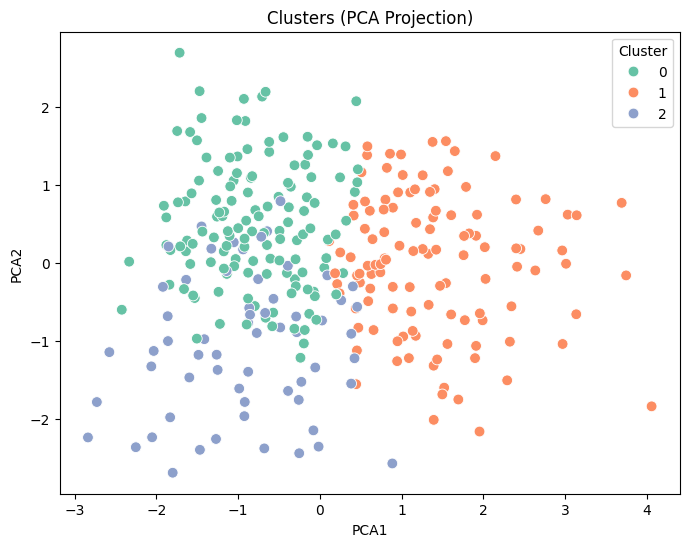

In [ ]:
import os
os.makedirs("visualizations", exist_ok=True)
# Visualizations
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df_num, palette="Set2", s=60)
plt.title("Clusters (PCA Projection)")
plt.savefig("visualizations/cluster_scatter.png")
plt.show()

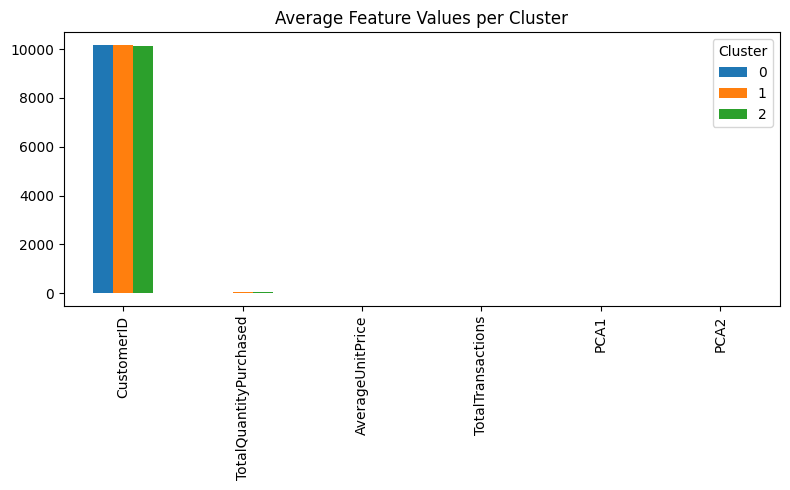

In [12]:

summary.T.plot(kind='bar', figsize=(8,5))
plt.title("Average Feature Values per Cluster")
plt.tight_layout()
plt.savefig("visualizations/cluster_profile_bar.png")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12844\2322985152.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df_num, palette="Set2")


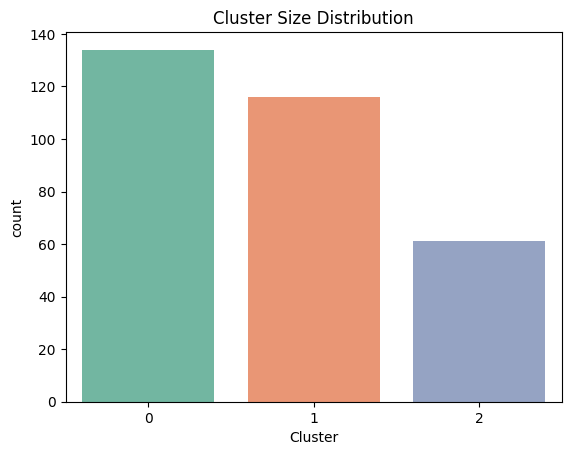

In [13]:
sns.countplot(x="Cluster", data=df_num, palette="Set2")
plt.title("Cluster Size Distribution")
plt.savefig("visualizations/cluster_distribution.png")
plt.show()


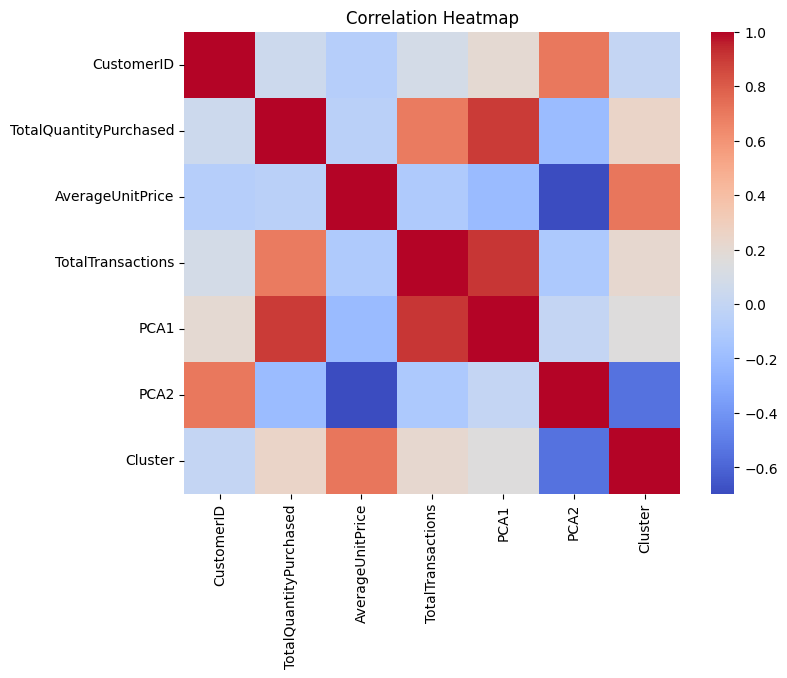

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df_num.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.savefig("visualizations/correlation_heatmap.png")
plt.show()

In [15]:
df_num.to_csv("clustered_output.csv", index=False)
print("Clustered dataset saved as clustered_output.csv")

Clustered dataset saved as clustered_output.csv
